### INTRODUCTION

**Objective**

Predicting airline passenger satisfaction using random forest, gradient boosting, and KNN.

**Dataset**

https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?resource=download

**Data Dictionary:**

1. **ID**: Unique passenger identifier

2. **Gender**: Gender of the passenger (Female/Male)

3. **Age**: Age of the passenger

4. **Customer Type**: Type of airline customer (First-time/Returning)

5. **Type of Travel**: Purpose of the flight (Business/Personal)

6. **Class**: Travel class in the airplane for the passenger seat

7. **Flight Distance**: Flight distance in miles

8. **Departure & Arrival Delay**: Flight departure & arrival delay in minutes

9. **Satisfaction**: Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)

*`"Satisfaction level from 1 (lowest) to 5 (highest) - 0 means ""not applicable""`*

10. **Departure & Arrival Time Convenience**

11. **Ease of Online Booking**

12. **Check-in Service**

13. **Online Boarding**

14. **Gate Location**

15. **On-board Service**

16. **Seat Comfort**

17. **Leg Room Service**

18. **Cleanliness**

19. **Food and Drink**

20. **In-flight Service**

21. **In-flight Wifi Service**

22. **In-flight Entertainment**

23. **Baggage Handling**





## Below are the steps executed in this notebook

<b> 1. IMPORT LIBRARIES </b> <br>
<b> 2. LOAD DATASET </b> <br>
<b> 3. DATA UNDERSTANDING </b> 
- 1. Check Data Description
- 2. Check data info
- 3. Check Missing Value
   
<b> 4. DATA PREPARATION </b>
- 1. Handling Missing Value
- 2. Duplicated Data
   
<b> 5. STATISTICAL SUMMARY </b>
- 1. Numerical columns
- 2. Categorical Columns
   
<b> 6. Outlier Detection </b>

<b> 7. Encoding Categorical Columns </b>
- 1. One-hot encoding
- 2. Label encoding on Target Column

<b> 8. Export encoded data for EDA </b>

## 1. IMPORT LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. LOAD DATASET

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
print('Total Row : ', len(df))
df.head(5)

Total Row :  129880


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## 3. DATA UNDERSTANDING

### 1. Check Data Description

In [3]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### 2. Check data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### 3. Check Missing Value

In [5]:
null_value = (129880 - 129487 ) /129880
percentage = null_value * 100

print("missing value = {:.1f}%".format(percentage))

missing value = 0.3%


## 4. DATA PREPARATION

### 1. Handling Missing Value

Since there are very few missing values, the rows containing missing values will be dropped.

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

**NO MORE MISSING VALUE DETECTED**

### 2. Duplicated Data

In [8]:
df.duplicated().sum()

0

## 5. STATISTICAL SUMMARY

In [9]:
# select columns with categorical data and save column names
categoricals = list(df.select_dtypes(include=['object']).columns)

# select columns with numerical data and save column names
numericals = list(df.select_dtypes(include=['float', 'int']).columns)

categorical_count = len(df.select_dtypes(include=['object']).columns)
numerical_count = len(df.select_dtypes(include=['float', 'int']).columns)


# print column names
print('Categorical columns:', categorical_count,"->", categoricals)
print('Numerical columns:', numerical_count, "->",numericals)

Categorical columns: 5 -> ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
Numerical columns: 19 -> ['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


### 1. Numerical columns

In [10]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129487.0,64958.335169,37489.781165,1.0,32494.5,64972.0,97415.5,129880.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129487.0,14.643385,37.932867,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Check-in Service,129487.0,3.306239,1.266146,0.0,3.0,3.0,4.0,5.0
Online Boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Gate Location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0


In [11]:
filtered_columns = [col for col in numericals if df[col].mean() > df[col].median()]

# print filtered columns
print('Numerical columns with mean greater than median:', filtered_columns)

Numerical columns with mean greater than median: ['Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Check-in Service', 'Online Boarding', 'Cleanliness', 'Food and Drink']


**OBSERVATION:**

 Min-Max gap per column:

*   `ID` is a key value so we can ignore
*   `Age` has normal gap

*   `Flight Distance`,	`Departure Delay`,	`Arrival Delay` the gap is too big, not normal.
*   For the remaining columns, since they have only 1-5 unique values, they can be ignored when looking at their minimum and maximum values.

columns with skewed distribution because mean > median :

`Flight Distance`, `Departure Delay`, `Arrival Delay`, `Departure and Arrival Time Convenience`, `Check-in Service`, `Online Boarding`, `Cleanliness`, `Food and Drink`


### 2. Categorical Columns

In [12]:
df[categoricals].describe()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65703,105773,89445,61990,73225


**OBSERVATION:**

1. There are more female customers than male customers and more returning customers than new customers. The majority of the travel records are for business travel and business class, while the majority of the customers were neutral or dissatisfied with their travel experience.

2. The frequency percentage of Neutral or Dissatisfied passenger is 56% so this dataset is **imbalanced** 

## 6. Outlier Detection

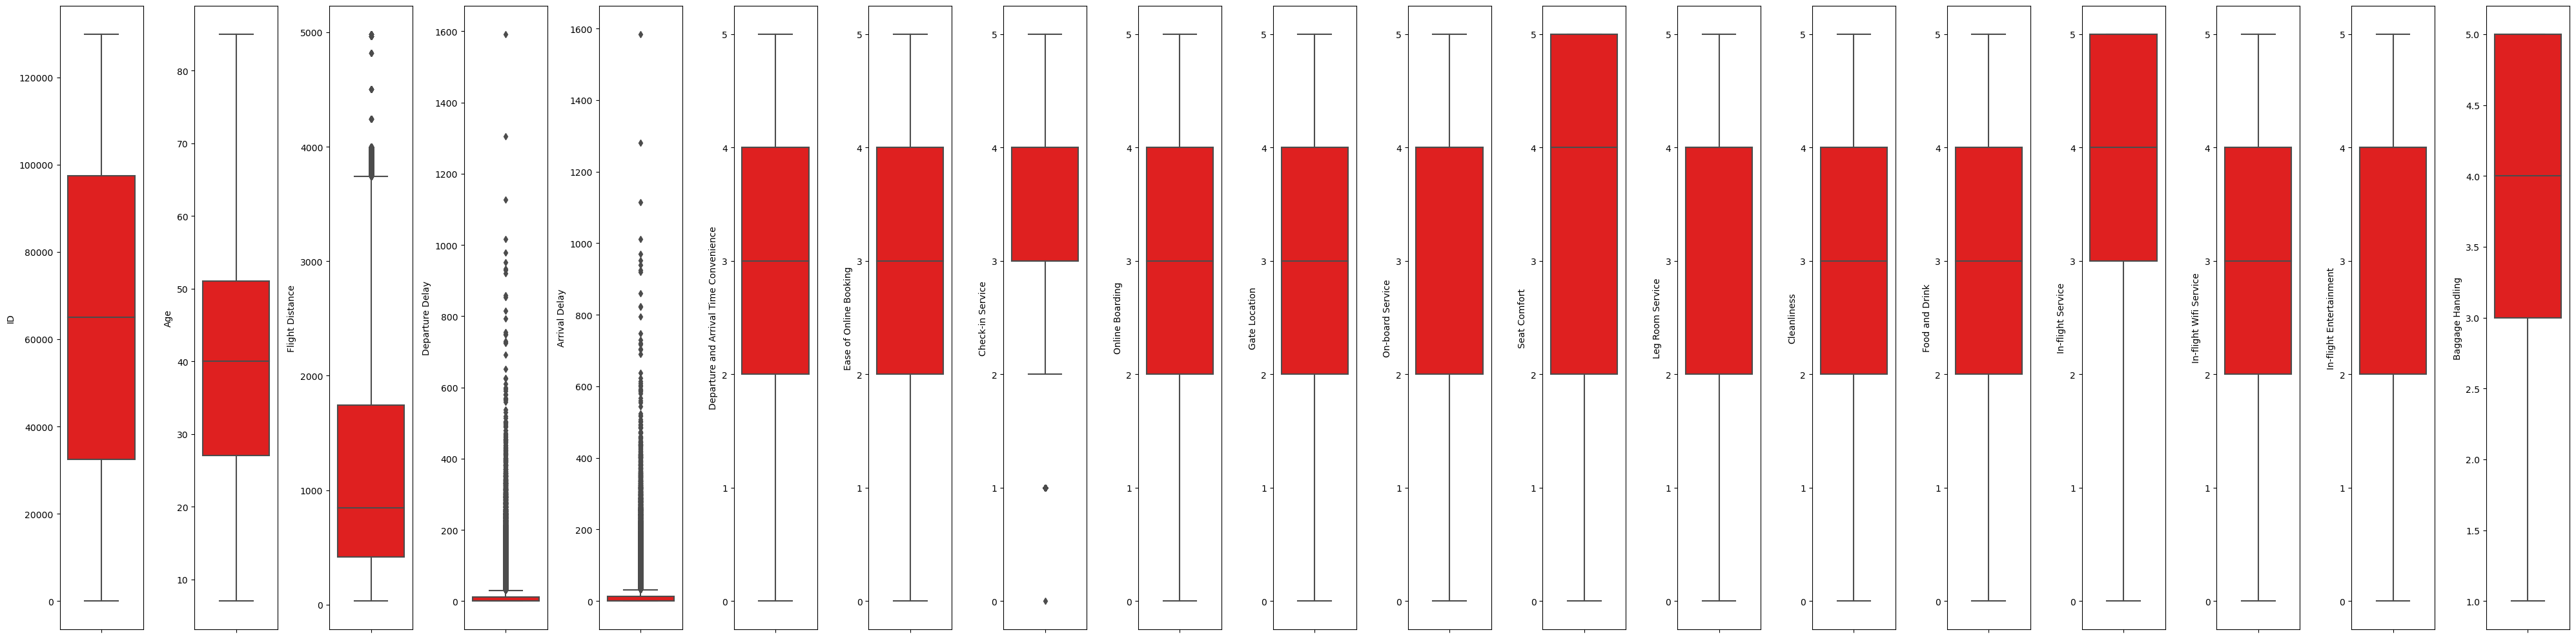

In [13]:
# adjust the figure size for better readability
plt.figure(figsize=(40,10))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

**OBSERVATIONS:**

Columns `Flight Distance`,	`Departure Delay`, `Arrival Delay`, and `Check-in Service` has outliers

## 7. Encoding Categorical Columns

In [14]:
for col in categoricals:
    print(f"Unique values of {col}: {df[col].unique()}")

Unique values of Gender: ['Male' 'Female']
Unique values of Customer Type: ['First-time' 'Returning']
Unique values of Type of Travel: ['Business' 'Personal']
Unique values of Class: ['Business' 'Economy' 'Economy Plus']
Unique values of Satisfaction: ['Neutral or Dissatisfied' 'Satisfied']


### 1. One-hot encoding

In [15]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [16]:
df_encoded['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

### 2. Label encoding on Target Column

In [17]:
# df_encoded['Satisfaction'] = (df_encoded['Satisfaction'] != 'Satisfied').astype(int)
df_encoded['Satisfaction'] = df_encoded['Satisfaction'].replace({"Neutral or Dissatisfied":1,"Satisfied":0})

In [18]:
# Reorder column
df_encoded = df_encoded[['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',
       'Gender_Female', 'Gender_Male', 'Customer Type_First-time',
       'Customer Type_Returning', 'Type of Travel_Business',
       'Type of Travel_Personal', 'Class_Business', 'Class_Economy',
       'Class_Economy Plus','Satisfaction']]

In [19]:
df_encoded.head(3)

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Satisfaction
0,1,48,821,2,5.0,3,3,4,3,3,...,0,1,1,0,1,0,1,0,0,1
1,2,35,821,26,39.0,2,2,3,5,2,...,1,0,0,1,1,0,1,0,0,0
2,3,41,853,0,0.0,4,4,4,5,4,...,0,1,0,1,1,0,1,0,0,0


## 8. Export encoded data for EDA

In [20]:
df_encoded.to_csv("airline_passenger_satisfaction_EDA.csv",index=False)